<a href="https://colab.research.google.com/github/Diwakar-Gupta/LrcDataScience/blob/main/22-01-31-Decision_Tree/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gini Entropy

splitter{“best”, “random”}

In [ ]:
x = np.linspace(0, 1, 200)
ye = -x*np.log(x) + -(1-x)*np.log(1-x)
yg = 1 - (x*x + (1-x)**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


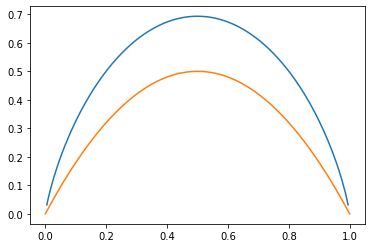

In [ ]:
plt.plot(x, ye)
plt.plot(x, yg)

# Probelms



*   Even Odd  <
*   Ordinal
*   Nominal



1.   Depth
2.   pruning ccp_alphanon



sklearn decision tree dont support categorical features

## EvenOdd


In [ ]:
import numpy as np

In [ ]:
x = np.arange(1000)
y = x%2
y[0:100] = 0
y[50] = 1

In [ ]:
X = x.reshape(-1, 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
clf.score(X, y)

0.552

In [ ]:
print(clf.get_depth())

3


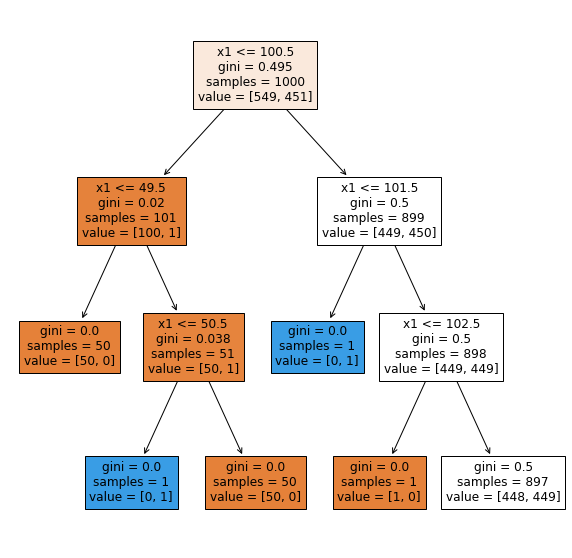

In [ ]:
from sklearn import tree

plt.figure(figsize=(10, 10))

tree.plot_tree(clf, feature_names=['x1'], filled = True)
plt.show()

## Regression

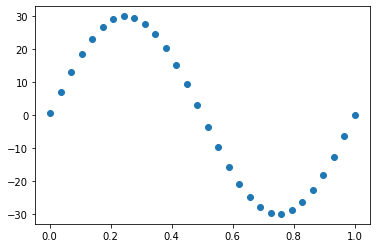

In [ ]:
x = np.linspace(1, 360, 30)
y = np.sin(np.deg2rad(x))*30
x /= x.max()

plt.scatter(x, y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = x.reshape(-1, 1)

model = DecisionTreeRegressor(max_depth = 3)

model.fit(X, y)

DecisionTreeRegressor(max_depth=3)

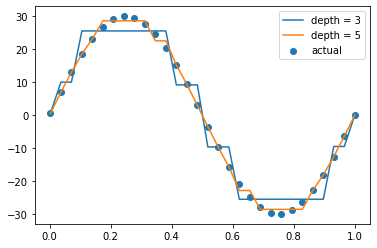

In [ ]:
for i in [3, 5]:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X, y)
    plt.plot(x, model.predict(X), label = 'depth = {}'.format(i))
    
plt.scatter(x, y, label = 'actual')
plt.legend()

[Interaction](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#:~:text=The%20interact%20function%20(%20ipywidgets.,get%20started%20using%20IPython's%20widgets.)

In [ ]:
from ipywidgets import interact
import matplotlib.pyplot as plt

def fun(max_depth):
    model = DecisionTreeRegressor(max_depth = max_depth)
    model.fit(X, y)
    plt.plot(x, model.predict(X), label = 'depth = {}'.format(max_depth), color = 'orange')
    plt.scatter(x, y, label = 'actual')
    plt.legend()

interact(fun, max_depth=3);

interactive(children=(IntSlider(value=3, description='max_depth', max=9, min=-3), Output()), _dom_classes=('wi…

## Noise

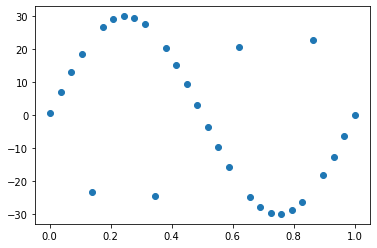

In [ ]:
y[4] *= -1
y[10] *= -1
y[18] *= -1
y[25] *= -1

plt.scatter(x, y)

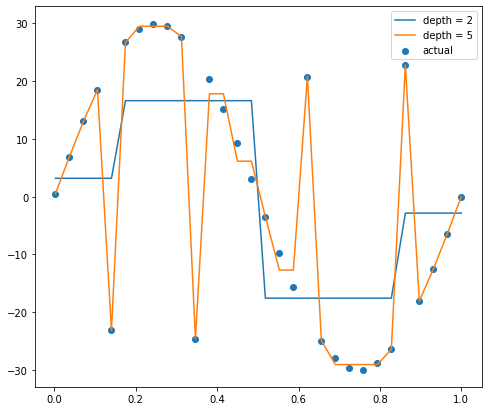

In [ ]:
plt.figure(figsize = (8, 7))

for i in [2, 5]:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X, y)
    plt.plot(x, model.predict(X), label = 'depth = {}'.format(i))
    
plt.scatter(x, y, label = 'actual')
plt.legend()

In [ ]:
interact(fun, max_depth=3)

interactive(children=(IntSlider(value=3, description='max_depth', max=9, min=-3), Output()), _dom_classes=('wi…

<function __main__.fun>

# Scratch

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
class Node: 
    """
    Class for creating the nodes for a decision tree 
    """
    def __init__(
        self, 
        Y: list,
        X: pd.DataFrame,
        min_samples_split=None,
        max_depth=None,
        depth=None,
        node_type=None,
        rule=None
    ):
        # Saving the data to the node 
        self.Y = Y 
        self.X = X

        # Saving the hyper parameters
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 5

        # Default current depth of node 
        self.depth = depth if depth else 0

        # Extracting all the features
        self.features = list(self.X.columns)

        # Type of node 
        self.node_type = node_type if node_type else 'root'

        # Rule for spliting 
        self.rule = rule if rule else ""

        # Calculating the counts of Y in the node 
        self.counts = Counter(Y)

        # Getting the GINI impurity based on the Y distribution
        self.gini_impurity = self.get_GINI()

        # Sorting the counts and saving the final prediction of the node 
        counts_sorted = list(sorted(self.counts.items(), key=lambda item: item[1]))

        # Getting the last item
        yhat = None
        if len(counts_sorted) > 0:
            yhat = counts_sorted[-1][0]

        # Saving to object attribute. This node will predict the class with the most frequent class
        self.yhat = yhat 

        # Saving the number of observations in the node 
        self.n = len(Y)

        # Initiating the left and right nodes as empty nodes
        self.left = None 
        self.right = None 

        # Default values for splits
        self.best_feature = None 
        self.best_value = None 

    @staticmethod
    def GINI_impurity(y1_count: int, y2_count: int) -> float:
        """
        Given the observations of a binary class calculate the GINI impurity
        """
        # Ensuring the correct types
        if y1_count is None:
            y1_count = 0

        if y2_count is None:
            y2_count = 0

        # Getting the total observations
        n = y1_count + y2_count
        
        # If n is 0 then we return the lowest possible gini impurity
        if n == 0:
            return 0.0

        # Getting the probability to see each of the classes
        p1 = y1_count / n
        p2 = y2_count / n
        
        # Calculating GINI 
        gini = 1 - (p1 ** 2 + p2 ** 2)
        
        # Returning the gini impurity
        return gini

    @staticmethod
    def ma(x: np.array, window: int) -> np.array:
        """
        Calculates the moving average of the given list. 
        """
        return np.convolve(x, np.ones(window), 'valid') / window

    def get_GINI(self):
        """
        Function to calculate the GINI impurity of a node 
        """
        # Getting the 0 and 1 counts
        y1_count, y2_count = self.counts.get(0, 0), self.counts.get(1, 0)

        # Getting the GINI impurity
        return self.GINI_impurity(y1_count, y2_count)

    def best_split(self) -> tuple:
        """
        Given the X features and Y targets calculates the best split 
        for a decision tree
        """
        # Creating a dataset for spliting
        df = self.X.copy()
        df['Y'] = self.Y

        # Getting the GINI impurity for the base input 
        GINI_base = self.get_GINI()

        # Finding which split yields the best GINI gain 
        max_gain = 0

        # Default best feature and split
        best_feature = None
        best_value = None

        for feature in self.features:
            # Droping missing values
            Xdf = df.dropna().sort_values(feature)

            # Sorting the values and getting the rolling average
            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
                # Spliting the dataset 
                left_counts = Counter(Xdf[Xdf[feature]<value]['Y'])
                right_counts = Counter(Xdf[Xdf[feature]>=value]['Y'])

                # Getting the Y distribution from the dicts
                y0_left, y1_left, y0_right, y1_right = left_counts.get(0, 0), left_counts.get(1, 0), right_counts.get(0, 0), right_counts.get(1, 0)

                # Getting the left and right gini impurities
                gini_left = self.GINI_impurity(y0_left, y1_left)
                gini_right = self.GINI_impurity(y0_right, y1_right)

                # Getting the obs count from the left and the right data splits
                n_left = y0_left + y1_left
                n_right = y0_right + y1_right

                # Calculating the weights for each of the nodes
                w_left = n_left / (n_left + n_right)
                w_right = n_right / (n_left + n_right)

                # Calculating the weighted GINI impurity
                wGINI = w_left * gini_left + w_right * gini_right

                # Calculating the GINI gain 
                GINIgain = GINI_base - wGINI

                # Checking if this is the best split so far 
                if GINIgain > max_gain:
                    best_feature = feature
                    best_value = value 

                    # Setting the best gain to the current one 
                    max_gain = GINIgain

        return (best_feature, best_value)

    def grow_tree(self):
        """
        Recursive method to create the decision tree
        """
        # Making a df from the data 
        df = self.X.copy()
        df['Y'] = self.Y

        # If there is GINI to be gained, we split further 
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split):

            # Getting the best split 
            best_feature, best_value = self.best_split()

            if best_feature is not None:
                # Saving the best split to the current node 
                self.best_feature = best_feature
                self.best_value = best_value

                # Getting the left and right nodes
                left_df, right_df = df[df[best_feature]<=best_value].copy(), df[df[best_feature]>best_value].copy()

                # Creating the left and right nodes
                left = Node(
                    left_df['Y'].values.tolist(), 
                    left_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split, 
                    node_type='left_node',
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                    )

                self.left = left 
                self.left.grow_tree()

                right = Node(
                    right_df['Y'].values.tolist(), 
                    right_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split,
                    node_type='right_node',
                    rule=f"{best_feature} > {round(best_value, 3)}"
                    )

                self.right = right
                self.right.grow_tree()

    def print_info(self, width=4):
        """
        Method to print the infromation about the tree
        """
        # Defining the number of spaces 
        const = int(self.depth * width ** 1.5)
        spaces = "-" * const
        
        if self.node_type == 'root':
            print("Root")
        else:
            print(f"|{spaces} Split rule: {self.rule}")
        print(f"{' ' * const}   | GINI impurity of the node: {round(self.gini_impurity, 2)}")
        print(f"{' ' * const}   | Class distribution in the node: {dict(self.counts)}")
        print(f"{' ' * const}   | Predicted class: {self.yhat}")   

    def print_tree(self):
        """
        Prints the whole tree from the current node to the bottom
        """
        self.print_info() 
        
        if self.left is not None: 
            self.left.print_tree()
        
        if self.right is not None:
            self.right.print_tree()

    def predict(self, X:pd.DataFrame):
        """
        Batch prediction method
        """
        predictions = []

        for _, x in X.iterrows():
            values = {}
            for feature in self.features:
                values.update({feature: x[feature]})
        
            predictions.append(self.predict_obs(values))
        
        return predictions

    def predict_obs(self, values: dict) -> int:
        """
        Method to predict the class given a set of features
        """
        cur_node = self
        while cur_node.depth < cur_node.max_depth:
            # Traversing the nodes all the way to the bottom
            best_feature = cur_node.best_feature
            best_value = cur_node.best_value

            if cur_node.n < cur_node.min_samples_split:
                break 

            if (values.get(best_feature) < best_value):
                if self.left is not None:
                    cur_node = cur_node.left
            else:
                if self.right is not None:
                    cur_node = cur_node.right
            
        return cur_node.yhat

# Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/SrikanthVelpuri/Mushroom-Classification/master/mushrooms.csv')
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4787,p,f,f,y,f,f,f,c,b,p,e,b,k,k,b,p,p,w,o,l,h,y,g
7045,p,f,y,e,f,y,f,c,n,b,t,?,k,s,w,p,p,w,o,e,w,v,p
5678,p,f,s,b,t,f,f,c,b,w,t,b,f,s,w,w,p,w,o,p,h,s,g
7746,e,x,s,w,f,n,f,w,b,p,e,?,k,k,w,w,p,w,t,p,w,n,g
2056,e,x,f,g,t,n,f,c,b,u,t,b,s,s,g,p,p,w,o,p,n,v,d


In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
Y = pd.Series(np.where(df['class'] == 'e', 0, 1))
X = df.drop(['class'], axis = 1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
X=ohe.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
model.score(xtest, ytest)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, model.predict(xtest))

array([[1055,    0],
       [   0,  976]])

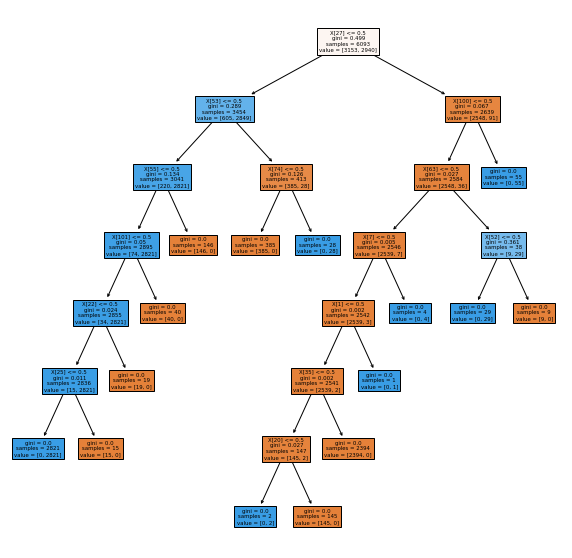

In [ ]:
from sklearn import tree

plt.figure(figsize=(10, 10))
tree.plot_tree(model, filled = True)
plt.show()